<h1 align="center"> HW Assignment 11- Data Competition</h1>
<h2 align="center"> Final Model- Random Forests with best Hyper parameters</h2>
<h3 align="center"> IST 5520: Data Science and Machine Learning with Python </h3>
<h3 align="center"> By: Austin Funcheon and Viraj Rane </h3>

## 1. Data

### 1.1. Import training Dataset

Import train_data.csv file as training data.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics

In [51]:
data = pd.read_csv('train_data.csv')
data.sample(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
776,0.00,0.0,0.00,0.0,0.19,0.00,0.00,0.0,0.09,0.00,...,0.000,0.096,0.027,0.068,0.000,0.0,2.059,25,593,0
1222,0.09,0.0,0.09,0.0,0.39,0.09,0.09,0.0,0.19,0.29,...,0.000,0.136,0.000,0.318,0.151,0.0,6.813,494,1458,1
513,0.00,0.0,0.34,0.0,0.34,0.00,0.00,0.0,0.00,0.00,...,0.000,0.149,0.000,0.000,0.000,0.0,2.350,14,188,0
487,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.000,0.000,0.374,0.000,0.000,0.0,1.583,8,19,0
1299,0.00,0.0,0.40,0.0,0.00,0.00,0.20,0.0,0.80,0.20,...,0.033,0.066,0.000,0.133,0.066,0.0,2.704,30,192,1


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              3220 non-null   float64
 1   word_freq_address           3220 non-null   float64
 2   word_freq_all               3220 non-null   float64
 3   word_freq_3d                3220 non-null   float64
 4   word_freq_our               3220 non-null   float64
 5   word_freq_over              3220 non-null   float64
 6   word_freq_remove            3220 non-null   float64
 7   word_freq_internet          3220 non-null   float64
 8   word_freq_order             3220 non-null   float64
 9   word_freq_mail              3220 non-null   float64
 10  word_freq_receive           3220 non-null   float64
 11  word_freq_will              3220 non-null   float64
 12  word_freq_people            3220 non-null   float64
 13  word_freq_report            3220 

In [53]:
data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,...,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,0.099854,0.219792,0.284391,0.041627,0.306783,0.100839,0.112981,0.108127,0.087357,0.239550,...,0.039989,0.140453,0.016707,0.268132,0.072931,0.048461,5.213943,53.550311,285.312112,0.394099
std,0.285808,1.329902,0.504691,1.010729,0.654040,0.289473,0.402128,0.414894,0.255191,0.661345,...,0.251293,0.293065,0.111976,0.811123,0.223694,0.501323,33.335451,219.385696,621.036731,0.488732
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.571000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.250000,15.000000,95.500000,0.000000
75%,0.000000,0.000000,0.430000,0.000000,0.370000,0.000000,0.000000,0.000000,0.000000,0.150000,...,0.000000,0.184000,0.000000,0.326250,0.051000,0.000000,3.690250,42.000000,264.250000,1.000000
max,4.340000,14.280000,4.540000,40.130000,10.000000,5.880000,7.270000,11.110000,2.590000,18.180000,...,4.385000,9.752000,4.081000,32.478000,5.300000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [54]:
data['class'].value_counts()

0    1951
1    1269
Name: class, dtype: int64

In [55]:
# defining the outcome variable 'y' and predictors 'X'
y = data['class']
X = data.drop(columns='class')

In [56]:
X.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,...,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,0.099854,0.219792,0.284391,0.041627,0.306783,0.100839,0.112981,0.108127,0.087357,0.239550,...,0.035149,0.039989,0.140453,0.016707,0.268132,0.072931,0.048461,5.213943,53.550311,285.312112
std,0.285808,1.329902,0.504691,1.010729,0.654040,0.289473,0.402128,0.414894,0.255191,0.661345,...,0.313863,0.251293,0.293065,0.111976,0.811123,0.223694,0.501323,33.335451,219.385696,621.036731
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.571000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.250000,15.000000,95.500000
75%,0.000000,0.000000,0.430000,0.000000,0.370000,0.000000,0.000000,0.000000,0.000000,0.150000,...,0.000000,0.000000,0.184000,0.000000,0.326250,0.051000,0.000000,3.690250,42.000000,264.250000
max,4.340000,14.280000,4.540000,40.130000,10.000000,5.880000,7.270000,11.110000,2.590000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,5.300000,19.829000,1102.500000,9989.000000,15841.000000


In [57]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: class, dtype: int64

In [58]:
train_X = X
train_y = y

In [59]:
train_X.shape

(3220, 57)

In [60]:
train_y.shape

(3220,)

## 2. Import Test Dataset

In [61]:
testdata = pd.read_csv('test_data.csv')
testdata.sample(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
1164,0.0,0.00,1.36,0.0,0.68,0.68,0.00,0.00,0.00,0.00,...,0.000,0.357,0.0,0.000,0.000,0.000,1.294,5,44,0
809,0.0,0.00,1.92,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.000,1.416,6,17,1
1097,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,1.118,17.481,49,472,1
570,0.0,0.15,0.00,0.0,0.15,0.00,0.00,0.00,0.15,0.15,...,0.019,0.137,0.0,0.000,0.000,0.000,2.276,20,485,0
1126,0.0,0.00,0.59,0.0,0.29,0.59,0.59,0.29,0.00,0.29,...,0.088,0.000,0.0,0.044,0.132,0.000,1.592,15,121,0


In [62]:
y1 = testdata['class']
X1 = testdata.drop(columns='class')

In [63]:
test_X = X1
test_y = y1

In [64]:
test_X.shape

(1381, 57)

In [65]:
test_y.shape

(1381,)

## 2. Normalize data

In [66]:
# Create a scaler to do the transformation
scaler = preprocessing.MinMaxScaler().fit(train_X)

In [67]:
# Transform training X
train_X_scale = scaler.transform(train_X)
train_X_scale = pd.DataFrame(train_X_scale)
train_X_scale.columns = train_X.columns

#train_X_scale.describe().transpose()

In [68]:
# Transform test X
test_X_scale = scaler.transform(test_X)
test_X_scale = pd.DataFrame(test_X_scale)
test_X_scale.columns = test_X.columns

#test_X_scale.describe().transpose()

---
# 3. Random Forest Classifier

## 3.1 Random Forest with feature importance and without hyper-parameter tuning

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rf = RandomForestClassifier(n_estimators=7, max_features=9, random_state=123)

In [71]:
# Training RF model without hyper-parameters.
rf.fit(train_X_scale, train_y)

RandomForestClassifier(max_features=9, n_estimators=7, random_state=123)

In [72]:
#rf.feature_importances_

In [73]:
# Display of feature importance. Displays the most valuable/ important features
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = train_X_scale.columns,
                                   columns=['importance'])
feature_importances = feature_importances.sort_values('importance',ascending=False)

#feature_importances

<AxesSubplot:title={'center':'Feature Importance of Spam and Not Spam Emails'}>

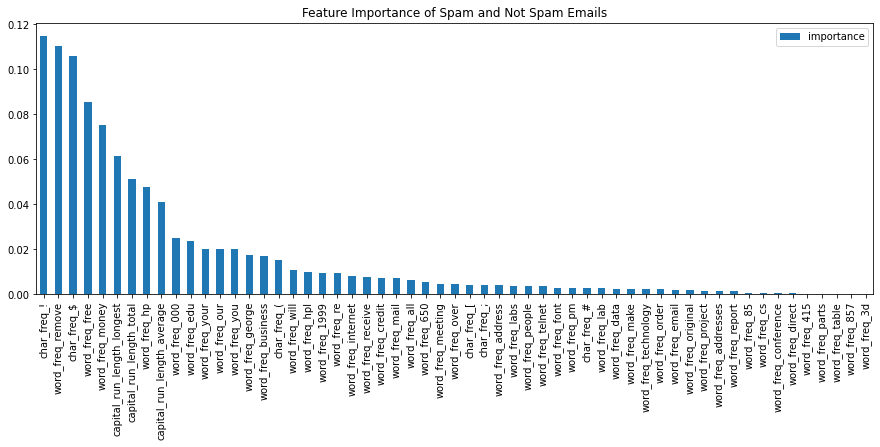

In [74]:
# plotting the important features bar plot.
feature_importances.plot(kind = 'bar',figsize=(15,5),
                         title='Feature Importance of Spam and Not Spam Emails')

**Using test dataset to assess the RF model.**

In [80]:
# Select the 17 most importance features
#train_X_scale_imp = train_X_scale[feature_importances.index[range(17)]]

In [84]:
pred_y_rf = rf.predict(test_X_scale) # scaled predictors have optimal performance

In [85]:
metrics.accuracy_score(test_y, pred_y_rf)

0.939898624185373

In [86]:
metrics.roc_auc_score(test_y, pred_y_rf)

0.9346526020802586

## 4.2 Random Forest with best hyper-parameter tuning

In [30]:
# n_estimators are the number of trees we want to take before taking maximum voting or avgs of the predictions
# max_features are the maxiumum number of features (predictors) random forest is allowed to try in a individual tree
parameters = {'criterion': ['entropy'],
              'n_estimators':[500],
              'max_features':[3],
              'random_state':[123]}
parameters

{'criterion': ['entropy'],
 'n_estimators': [500],
 'max_features': [3],
 'random_state': [123]}

In [31]:
rf2 = RandomForestClassifier()

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
# GridSearchCV will loop all the hyper-parameters that we have defined i.e. n_estimators and max_features. 
# it will fit the model on the training dataset.

grid_rf = GridSearchCV(rf2, parameters, scoring='roc_auc', cv=10)

**Training the RF model based on hyper-parameters.**

In [34]:
import time
start = time.time()
print('Start time :'+ time.strftime('%m/%d/%Y %H:%M:%S'))

grid_rf.fit(train_X_scale, train_y)

end = time.time()
print('End time :'+ time.strftime('%m/%d/%Y %H:%M:%S'))
print('Execution Time in seconds :'+ str(end - start))

Start time :12/03/2021 11:13:43
End time :12/03/2021 11:13:56
Execution Time in seconds :12.455350875854492


**Using Test dataset to assess the RF model with hyper-parameters.**

In [35]:
pred_y_rf2 = grid_rf.predict(test_X_scale) # scaled predictors have optimal performance

In [36]:
metrics.accuracy_score(test_y, pred_y_rf2)

0.9587255611875453

In [37]:
metrics.roc_auc_score(test_y, pred_y_rf2)

0.9540452157565537

In [38]:
print(metrics.classification_report(test_y, pred_y_rf2))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       837
           1       0.96      0.93      0.95       544

    accuracy                           0.96      1381
   macro avg       0.96      0.95      0.96      1381
weighted avg       0.96      0.96      0.96      1381



## 4.3 Comparing both RF models

In [39]:
acc = [metrics.accuracy_score(test_y, pred_y_rf),
      metrics.accuracy_score(test_y, pred_y_rf2)]

AUC = [metrics.roc_auc_score(test_y, pred_y_rf),
      metrics.roc_auc_score(test_y, pred_y_rf2)]

pd.DataFrame({'Accuracy':acc,'AUC':AUC},
             index = ['RF without hyper-parameter tuning','RF with hyper-parameter tuning'])

,Accuracy,AUC
RF without hyper-parameter tuning,0.939899,0.934653
RF with hyper-parameter tuning,0.958726,0.954045


**From the above result we can interpret that RF Classifier with hyper-parameters tunning gives us the best performance with an AUC score of 95.40%**

---
**We thereby conclude that Random forest classifier when tuned with hyper parameters on training dataset gives us an AUC score of 95.79% and the same model with its optimal hyper-parameters when tested on the test dataset gives us an AUC score of 95.40% which derives the RF classifier is having an optimal performance on both the train and test datasets.**